In [1]:
import numpy as np
import os 
import pandas as pd 
from surprise import SVD, KNNBasic, Dataset, Reader
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/ratings_small.csv')

reader = Reader(rating_scale=(0.5, 5))
dataset = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

pmf = SVD()
userFilter = KNNBasic(sim_options={'user_based': True})
itemFilter = KNNBasic(sim_options={'user_based': False})

C.

In [3]:
pmfResults =  cross_validate(pmf, dataset, measures=['MAE', 'RMSE'], cv=5, verbose=True)
userResults = cross_validate(userFilter, dataset, measures=['MAE', 'RMSE'], cv=5, verbose=True)
itemResults = cross_validate(itemFilter, dataset, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6894  0.6933  0.6900  0.6888  0.6954  0.6914  0.0026  
RMSE (testset)    0.8946  0.9010  0.8953  0.8976  0.9018  0.8981  0.0029  
Fit time          5.54    5.50    5.44    5.48    5.50    5.49    0.03    
Test time         0.18    0.23    0.24    0.17    0.23    0.21    0.03    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7424  0.7413  0.7440  0.7483  0.7439  0.7440  0.0024

D.

In [4]:
print("PMF")
print(pmfResults['test_mae'].mean())
print(pmfResults['test_rmse'].mean())
print("User")
print(userResults['test_mae'].mean())
print(userResults['test_rmse'].mean())
print("Item")
print(itemResults['test_mae'].mean())
print(itemResults['test_rmse'].mean())

PMF
0.6913603390161829
0.8980588533474437
User
0.7439883597673898
0.9681869169983844
Item
0.7210664353358187
0.9343834733048583


E.

In [5]:
userResultsCo = cross_validate(KNNBasic(sim_options={'name': 'cosine','user_based': True}), dataset, measures=['MAE', 'RMSE'], cv=5, verbose=True)
itemResultsCo = cross_validate(KNNBasic(sim_options={'name': 'cosine','user_based': False}), dataset, measures=['MAE', 'RMSE'], cv=5, verbose=True)
userResultsMsd = cross_validate(KNNBasic(sim_options={'name': 'msd','user_based': True}), dataset, measures=['MAE', 'RMSE'], cv=5, verbose=True)
itemResultsMsd = cross_validate(KNNBasic(sim_options={'name': 'msd','user_based': False}), dataset, measures=['MAE', 'RMSE'], cv=5, verbose=True)
userResultsPear = cross_validate(KNNBasic(sim_options={'name': 'pearson','user_based': True}), dataset, measures=['MAE', 'RMSE'], cv=5, verbose=True)
itemResultsPear = cross_validate(KNNBasic(sim_options={'name': 'pearson','user_based': False}), dataset, measures=['MAE', 'RMSE'], cv=5, verbose=True)

resultsUser = {}
resultsItem = {}

resultsUser['cosine'] = (userResultsCo["test_mae"].mean(), userResultsCo["test_rmse"].mean())
resultsItem['cosine'] = (itemResultsCo["test_mae"].mean(), userResultsCo["test_rmse"].mean())
resultsUser['msd'] = (userResultsMsd["test_mae"].mean(), userResultsCo["test_rmse"].mean())
resultsItem['msd'] = (itemResultsMsd["test_mae"].mean(), userResultsCo["test_rmse"].mean())
resultsUser['pearson'] = (userResultsPear["test_mae"].mean(), userResultsCo["test_rmse"].mean())
resultsItem['pearson'] = (itemResultsPear["test_mae"].mean(), userResultsCo["test_rmse"].mean())

df_user = pd.DataFrame(resultsUser, index=["MAE", "RMSE"]).T
df_item = pd.DataFrame(resultsItem, index=["MAE", "RMSE"]).T

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7712  0.7657  0.7665  0.7621  0.7742  0.7680  0.0043  
RMSE (testset)    0.9959  0.9937  0.9905  0.9858  1.0034  0.9939  0.0059  
Fit time          0.45    0.47    0.46    0.47    0.46    0.46    0.01    
Test time         1.87    1.96    1.85    1.88    1.94    1.90    0.04    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

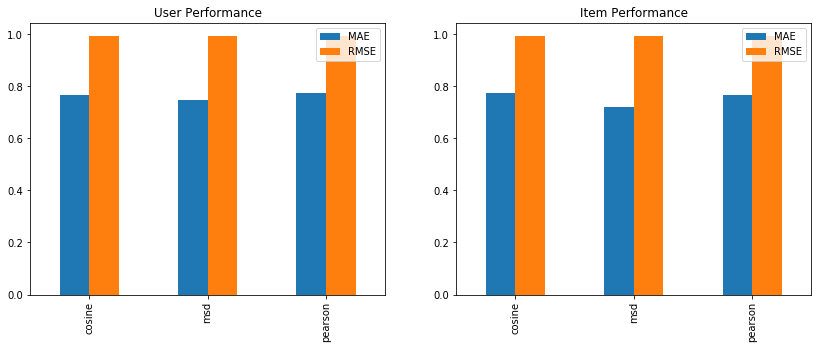

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

df_user.plot(kind="bar", ax=ax[0], title="User Performance")
df_item.plot(kind="bar", ax=ax[1], title="Item Performance")

plt.show()

F. 

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9893  1.0035  0.9921  0.9894  0.9986  0.9946  0.0056  
Fit time          0.47    0.49    0.47    0.48    0.47    0.48    0.01    
Test time         1.87    1.95    1.87    1.89    2.01    1.92    0.05    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix

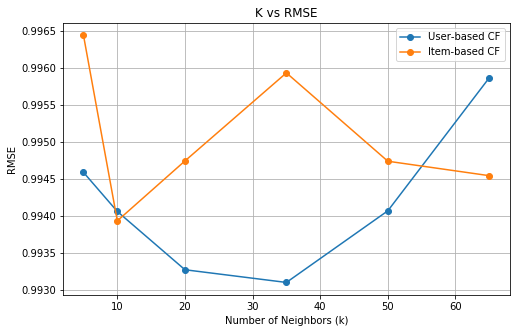

In [7]:
ks = [5, 10, 20, 35, 50, 65]
userVals = []
itemVals = []

for k in ks:
    userResultsCo = cross_validate(KNNBasic(sim_options={'name': 'cosine','user_based': True}), dataset, measures=['RMSE'], cv=5, verbose=True)
    itemResultsCo = cross_validate(KNNBasic(sim_options={'name': 'cosine','user_based': False}), dataset, measures=['RMSE'], cv=5, verbose=True)
    userVals.append(userResultsCo["test_rmse"].mean())
    itemVals.append(itemResultsCo["test_rmse"].mean())

plt.figure(figsize=(8,5))
plt.plot(ks, userVals, marker="o", label="User-based CF")
plt.plot(ks, itemVals, marker="o", label="Item-based CF")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("RMSE")
plt.title("K vs RMSE")
plt.legend()
plt.grid()
plt.show()

G. - Not needed prolly